<a href="https://colab.research.google.com/github/oasquared/Transaction-Project/blob/main/Transaction_Prediction_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Transaction Success Prediction

## Problem Definition


### Business Problem:
A company wants to predict whether a future customer will complete a transaction based on historical transaction data. Understanding transaction likelihood helps optimize marketing strategies, reduce customer churn, and increase revenue by targeting potential buyers more effectively.

### Data Science Problem:
This is a supervised learning problem because we have labeled data (successful vs. unsuccessful transactions). Specifically, it is a binary classification problem where the target variable indicates whether a transaction occurs (1) or not (0).

We will apply the Gaussian Naïve Bayes classification technique to build a predictive model that classifies new customers based on their transaction data. Since the features are anonymized, all variables will be treated equally without prior domain knowledge.

Goal: Train a model that accurately predicts whether a future customer will make a transaction, helping the business make data-driven decisions.

## Data Collection/Sources


### Import

In [ ]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.metrics import precision_score, recall_score, f1_score
from IPython.display import display

### Load Data

In [ ]:
trans_original = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'
trans_data = pd.read_csv(trans_original)
trans_data.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [ ]:
trans_data.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


In [ ]:
trans_data.shape

(180000, 53)

## Data Cleaning


In [ ]:
tran_Val=trans_data.copy()    # copy from Original data
tran_target=trans_data.copy()
tran_copy =trans_data.copy()

In [ ]:
tran_copy.isna().sum().sum() # checking for null

0

No null in the data set. Good!

In [ ]:
tran_copy['target'].value_counts() # check target values (7)

,count
target,
0,161960
1,18040


This shows that the target is zero and one which is good, but the data is not balance. This shows the data is skewed.

In [ ]:
tran_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

Data type are consistent. Good!

In [ ]:
tran_Val= tran_copy.drop(columns=["Unnamed: 0", "ID_code", "target"])  # column drop for correlation check

In [ ]:
tran_Val.shape

(180000, 50)

## Exploratory Data Analysis


### Feature Correlation

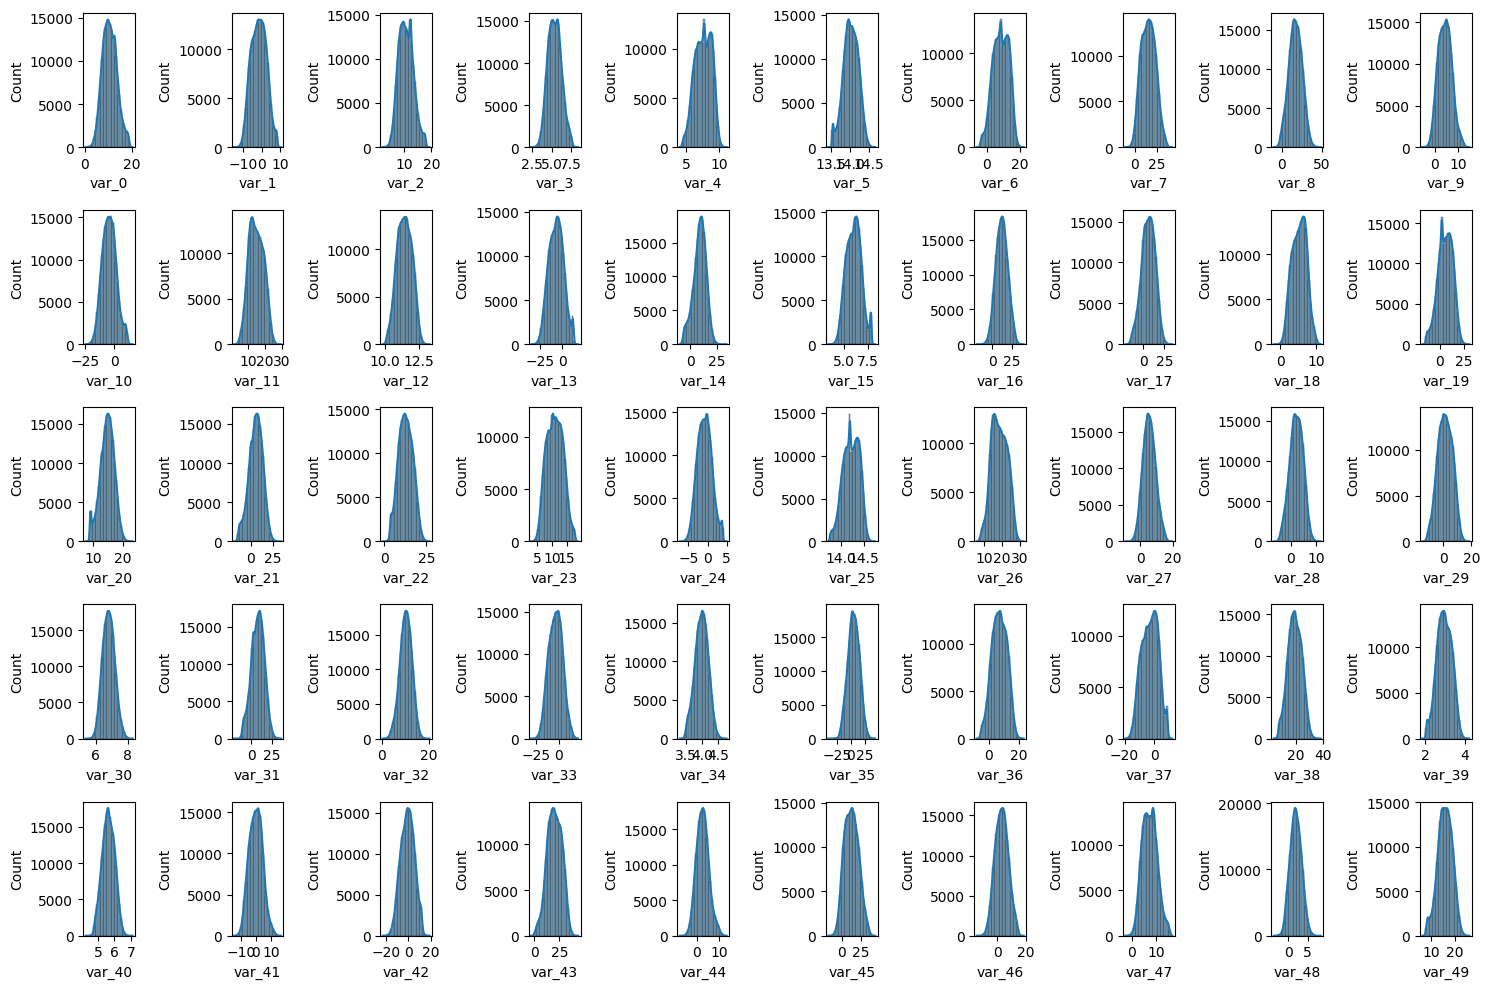

In [ ]:
# Histograms and KDE plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(tran_Val):
    plt.subplot(5, 10, i + 1)  # Adjust for the number of variables
    sns.histplot(tran_copy[col], kde=True, bins=30)
    #plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

The predictors are relatively normally distributed as showed in plots.

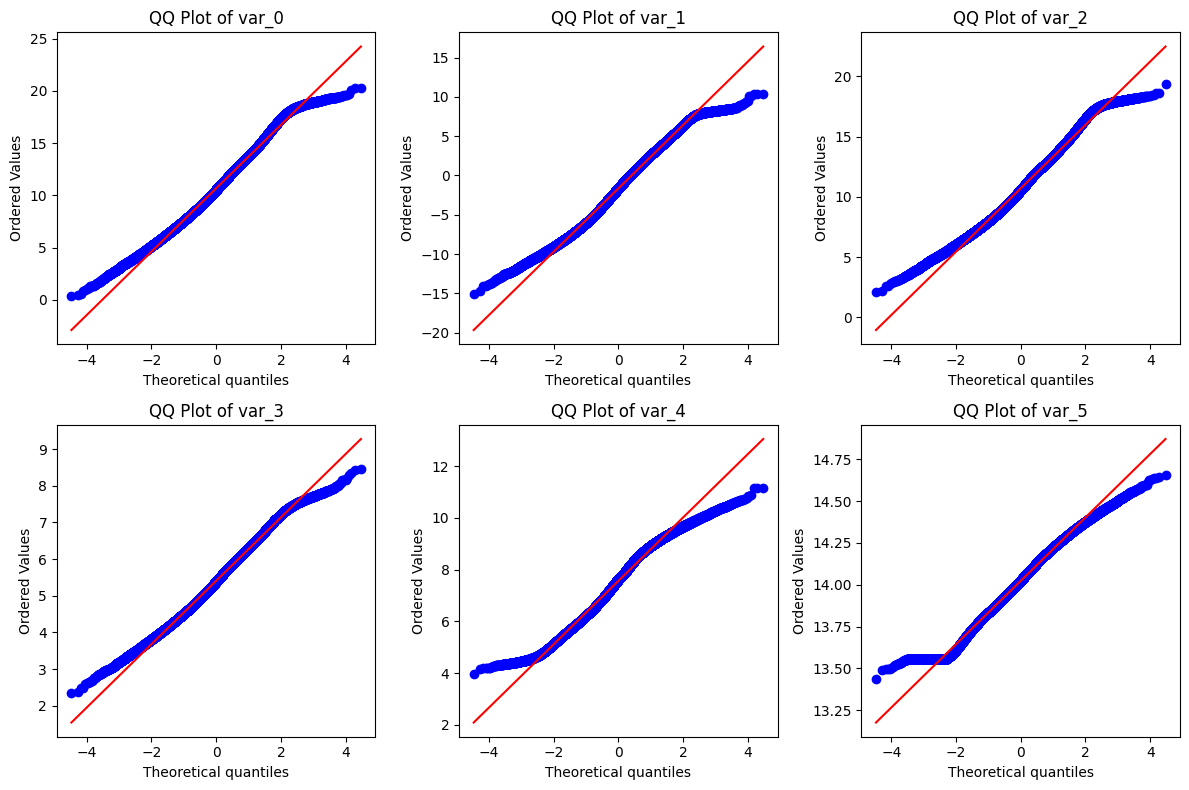

In [ ]:
num_cols = tran_Val.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols[:6]):  # Adjust if too many variables
    plt.subplot(2, 3, i + 1)
    stats.probplot(tran_Val[col].dropna(), dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")
plt.tight_layout()
plt.show()

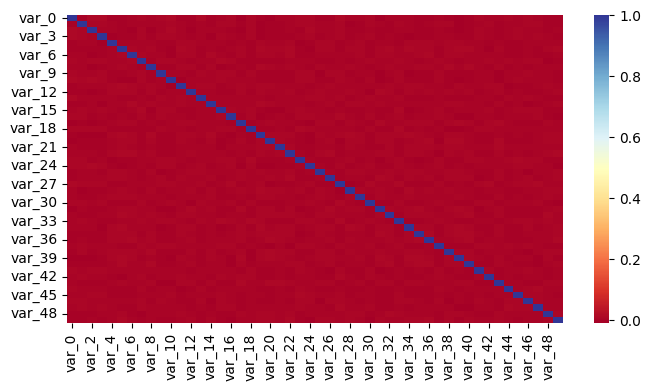

In [ ]:
corr = tran_Val.corr()   # check Correlation (8)
plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap='RdYlBu',annot = False);

As seen in the plot above, there is no substantial correlation between all predictor. This support the decision to classify the ‘target’ using Naïve Bayes.

In [ ]:
#Data frames for successful transactions and unsuccessful transactions
tran_copy_success = tran_copy[tran_copy['target'] == 1].copy()
tran_copy_failure = tran_copy[tran_copy['target'] == 0].copy()
# Display basic info to confirm
print("Successful Transactions:", tran_copy_success.shape)
print("Unsuccessful Transactions:", tran_copy_failure.shape)

Successful Transactions: (18040, 53)
Unsuccessful Transactions: (161960, 53)


## Processing


### Gaussian Naive Bayes Model

In [ ]:
gnb = GaussianNB()

### Unbalanced Data Model (Full)

In [ ]:
X= tran_copy.drop(columns=["Unnamed: 0", "ID_code", "target"]).copy()
y = tran_copy["target"].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}"

Number of mislabeled points out of a total 36000 points : 3283


In [ ]:
# Check manual accuracy
(1-3283/36000)*100

90.88055555555556

### Confusion Matrix(Unbalanced Case)

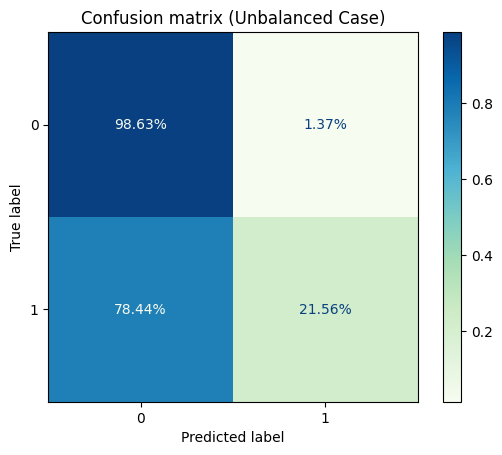

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix (Unbalanced Case)') ;
plt.savefig('confusion_matrix.png')

This shows that our model fit better for transaction failure.

### Cross-Validation of Unbalanced case

In [ ]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [ ]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean()*100, 5))

91.12733


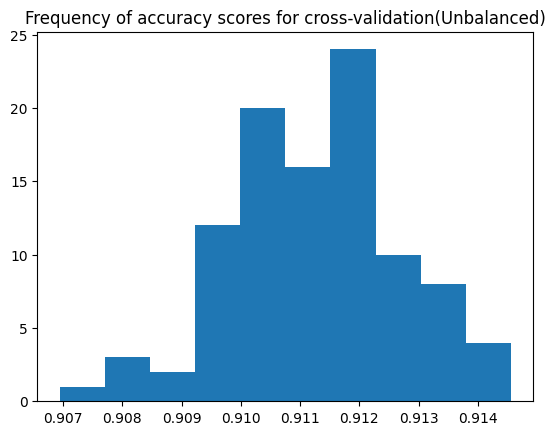

In [ ]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation(Unbalanced)')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have the actual and predicted labels
y_true = y_test  # True labels from test set
y_pred = gnb.predict(X_test)  # Predicted labels from the model

# Calculate per-class Precision, Recall, and F1-score
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

metrics_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score"],
    "Class 0": [precision[0]*100, recall[0]*100, f1[0]*100],
    "Class 1": [precision[1]*100, recall[1]*100, f1[1]*100]
})
# Display as a table in Colab (Reference for ChatGPT)
from IPython.display import display
display(metrics_df.transpose())

,0,1,2
Metric,Precision,Recall,F1-score
Class 0,91.830808,98.634876,95.11131
Class 1,63.859362,21.562673,32.239422


### Undersampling Unsucessful Transactions to match successful Transactions

In [ ]:
#Successful Transactions: (18040, 53)
#Unsuccessful Transactions: (161960, 53)
#tran_copy_failure
#tran_copy_success

# Get the number of successful transactions
num_successful = len(tran_copy_success)

# Randomly sample non-successful transactions to match the successful count
fail_match_sampled = tran_copy_failure.sample(n=num_successful, random_state=42)

# Combine both balanced datasets
match_tran = pd.concat([tran_copy_success, fail_match_sampled])

# Shuffle the dataset
match_tran = match_tran.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new class distribution
print(match_tran["target"].value_counts(normalize=True) * 100)

target
1    50.0
0    50.0
Name: proportion, dtype: float64


### Balanced Model(Reduced)

In [ ]:
match_tran_copy = match_tran.copy()
X= match_tran_copy.drop(columns=["Unnamed: 0", "ID_code", "target"]).copy()
y = match_tran_copy["target"].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# print(f"Number of mislabeled points out of a total {X_test.shape[0]} points : {(y_test != y_pred).sum()}"


Number of mislabeled points out of a total 7216 points : 1736


In [ ]:
(1-((y_test != y_pred).sum())/7216)*100   # Accuracy

75.94235033259423

### Confusion Matrix(Balanced Case)

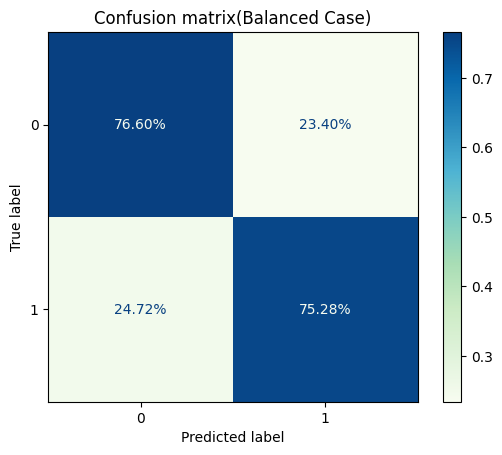

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'GnBu',
    )
plt.grid(False)
plt.title('Confusion matrix(Balanced Case)') ;
plt.savefig('confusion_matrix_2.png')

### Cross-Validation of balanced case

In [ ]:
def cross_validate2(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores2 = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores2[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores2

In [ ]:
accuracy_scores2 = cross_validate2(X, y, 100)
print(round(accuracy_scores2.mean()*100, 5))

75.83841


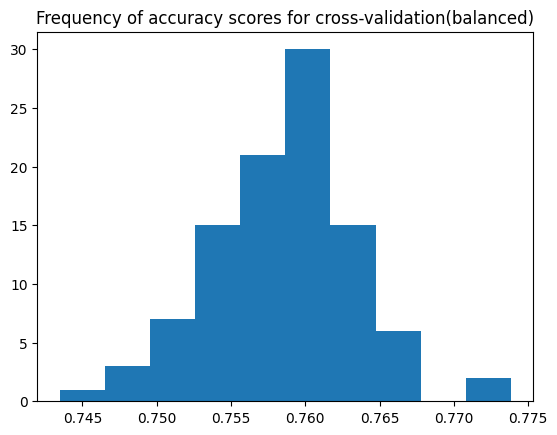

In [ ]:
plt.hist(accuracy_scores2)
plt.title('Frequency of accuracy scores for cross-validation(balanced)')
plt.show()

In [ ]:
# Assuming you have the actual and predicted labels
y_true = y_test  # True labels from test set
y_pred = gnb.predict(X_test)  # Predicted labels from the model

# Calculate per-class Precision, Recall, and F1-score
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

metrics_df = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-score"],
    "Class 0": [precision[0]*100, recall[0]*100, f1[0]*100],
    "Class 1": [precision[1]*100, recall[1]*100, f1[1]*100]
})
# Display as a table in Colab (Reference for ChatGPT)
from IPython.display import display
display(metrics_df.transpose())

,0,1,2
Metric,Precision,Recall,F1-score
Class 0,75.764192,76.600442,76.180022
Class 1,76.126126,75.278396,75.699888


## Data Visualization/Communication of Results


### Data Visualization

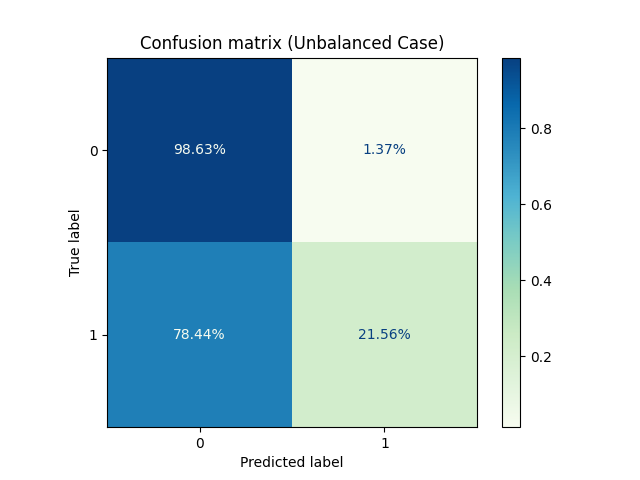

In [ ]:
Image('confusion_matrix.png')

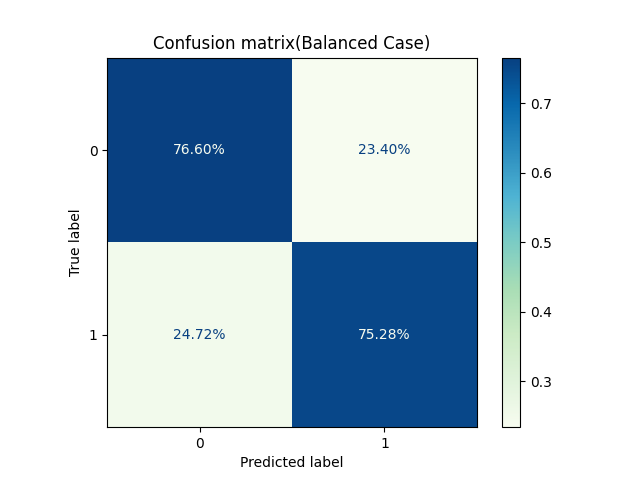

In [ ]:
Image('confusion_matrix_2.png')

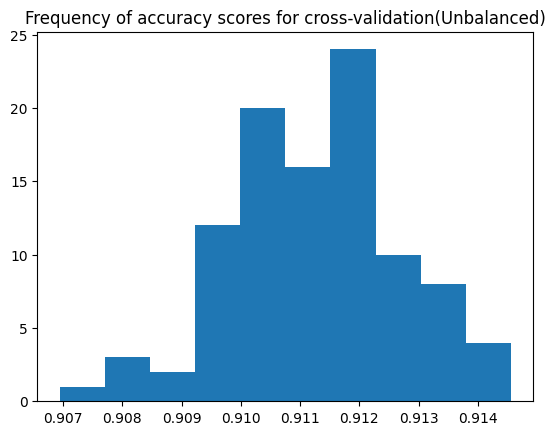

In [ ]:
plt.hist(accuracy_scores)
plt.title('Frequency of accuracy scores for cross-validation(Unbalanced)')
plt.show()

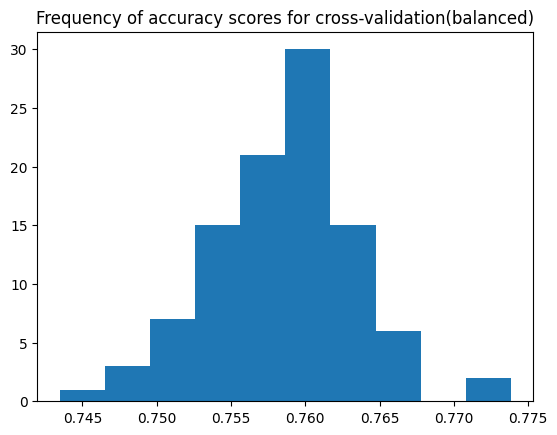

In [ ]:
plt.hist(accuracy_scores2)
plt.title('Frequency of accuracy scores for cross-validation(balanced)')
plt.show()

### Conclusion

#### Important features

- All feature is important for determining the transcaction success.
- All feature substantially not correlated with each other.
- Also, they are relatively normally distributed as showed in plots.

#### Model performance
Full model (Unbalanced Case)
- Using Naive Bayes resulted in an average accuracy of 91% in our cross-validation tests.
- Both Precision and Recall is low, model fails to detect successful transactions.
- High FN rate (78.44%) makes it unreliable for detecting important positive cases.
- The model is overly biased towards class 0 (Unsuccessful Transaction), leading to high training bias.
- The model fits class 0(Unsuccessful Transaction) well but fails for class 1(Successful Transaction).

Reduced Model (Balanced Case)/Comparison
- Using Naive Bayes resulted in an average accuracy of 76% in our cross-validation tests.
- The model correctly classified 77% of the actual class 0 (non-successful transactions).
- After balancing, 75% of successful transactions are now correctly identified, which is a significant improvement.
- The accuracy for class 0 (non-successful transactions) dropped from 99% (unbalanced) to 77%, which is expected because the model is now less biased towards the majority class.
- The model now does a much better job at predicting successful transactions, as well as unsccessful transactions



#### Future exploration/ Next steps

- It would be worth exploring alternative models like a random forest and see how that did compared to Naive Bayes.  
